# 4. MNIST 데이터로드

In [18]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

## 0) MNIST는 어떻게 생겼나?

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이: 60000
5
torch.Size([1, 28, 28])


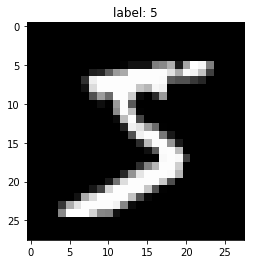

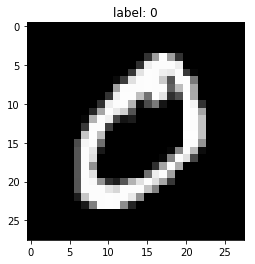

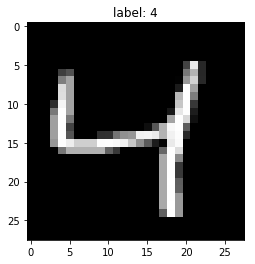

In [19]:
# 1. MNIST 로드
mnist_train=dset.MNIST("", train=True,transform=transforms.ToTensor(),    # train 용으로 쓰겠다.
                      target_transform=None, download=True)

# 2. 그려보기
# MNIST data 하나 형태 출력
image, label = mnist_train.__getitem__(0)
print image.size(), label

image, label = mnist_train[1]
print image.size(), label

print mnist_train.__len__()
print "mnist_train 길이:", len(mnist_train)

# 그리기
print mnist_train[0][1]  # label
print mnist_train[0][0].size()  # image

for i in range(3):
    img = mnist_train[i][0].numpy()  # image 타입을 numpy로 변환 (1,28,28)
    # print "label:", mnist_train[i][1]
    plt.title("label: %d" %mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

## 1) MNIST train, test dataset 가져오기

In [20]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True,transform=transforms.ToTensor(),    # train 용으로 쓰겠다.
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False,transform=transforms.ToTensor(),    # test 용으로 쓰겠다.
                      target_transform=None, download=True)

## 2) 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


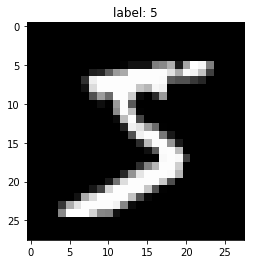

In [21]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0)  # 0번째 데이터
print "image data 형태:", image.size()
print "label: ", label

# 그리기
img = image.numpy()  # image 타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

## 3) 데이터 로드 함수

### 학습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [22]:
batch_size = 16

In [23]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                          # mnist_train를 트레인 시키자.
                                           shuffle=True, num_workers=2,
                                          drop_last=True)  # batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_train), batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

## 4) 데이터 로드함수 이해하기

[0]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


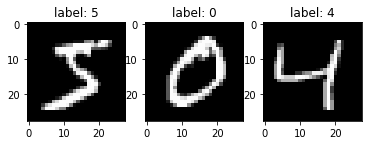

[1]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


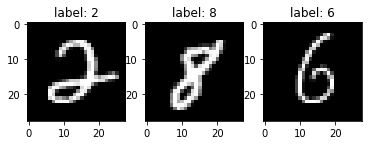

[2]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


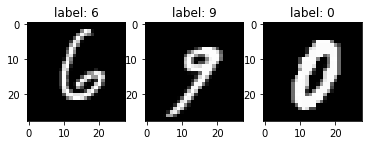

[3]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


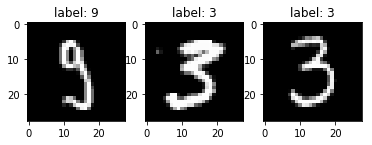

[4]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


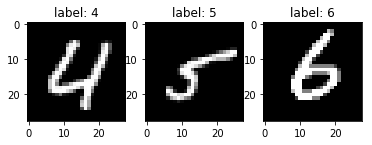

[5]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


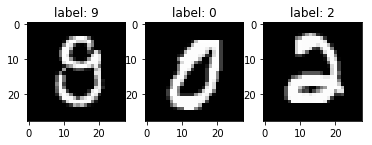

In [24]:
n = 3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader):  # batch_size 만큼
    if i>5:
        break
        
    print "[%d]" %i
    print "한 번에 로드되는 데이터 크기:", len(imgs)
    
    # GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 자동으로(?) CPU로 로드됨
    x = Variable(imgs)#.cuda()     # (batch_size, 1, 28, 28)
    x = x.reshape((x.shape[0], x.shape[2], x.shape[3]))  # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
    y_ = Variable(labels)#.cuda()  # (batch_size)
    
    print x.shape
    print y_.shape
    
    # 그리기
    for j in range(n):
        img = imgs[j].numpy()  # image 타입을 numpy로 변환 (1,28,28)
        img = img.reshape((img.shape[1], img.shape[2]))  # (1,28,28) -> (28,28)
        #print img.shape
        
        plt.subplot(1, n, j+1)  # (1,3) 형태 플랏의 j 번째 자리에 그리겠다
        plt.imshow(img, cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show()